# Facebook likes en films
Data opschonen
Data:
- Aantal films
- Gemiddeld aantal likes per film
- Director met meeste likes
- Actor met meeste likes

Graphs:
- Movies per jaar
- Film tijd per jaar
- Imdb score vs facebook likes

In [601]:
# Bibliotheken
from datetime import datetime
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [602]:
movieData = pd.read_csv('movie_metadata.csv', sep=',')

movieData

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,Action|Adventure|Fantasy|Sci-Fi,...,3054.000,English,USA,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000
1,Color,Gore Verbinski,302.000,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,Action|Adventure|Fantasy,...,1238.000,English,USA,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0
2,Color,Sam Mendes,602.000,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,Action|Adventure|Thriller,...,994.000,English,UK,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000
3,Color,Christopher Nolan,813.000,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,Action|Thriller,...,2701.000,English,USA,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000
4,NaN,Doug Walker,nan,nan,131.000,nan,Rob Walker,131.000,nan,Documentary,...,nan,NaN,NaN,NaN,nan,nan,12.000,7.100,nan,0
5,Color,Andrew Stanton,462.000,132.000,475.000,530.000,Samantha Morton,640.000,73058679.000,Action|Adventure|Sci-Fi,...,738.000,English,USA,PG-13,263700000.000,2012.000,632.000,6.600,2.350,24000
6,Color,Sam Raimi,392.000,156.000,0.000,4000.000,James Franco,24000.000,336530303.000,Action|Adventure|Romance,...,1902.000,English,USA,PG-13,258000000.000,2007.000,11000.000,6.200,2.350,0
7,Color,Nathan Greno,324.000,100.000,15.000,284.000,Donna Murphy,799.000,200807262.000,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.000,English,USA,PG,260000000.000,2010.000,553.000,7.800,1.850,29000
8,Color,Joss Whedon,635.000,141.000,0.000,19000.000,Robert Downey Jr.,26000.000,458991599.000,Action|Adventure|Sci-Fi,...,1117.000,English,USA,PG-13,250000000.000,2015.000,21000.000,7.500,2.350,118000
9,Color,David Yates,375.000,153.000,282.000,10000.000,Daniel Radcliffe,25000.000,301956980.000,Adventure|Family|Fantasy|Mystery,...,973.000,English,UK,PG,250000000.000,2009.000,11000.000,7.500,2.350,10000


In [603]:
imdbExtraData = pd.read_csv('IMDB-Movie-Data.csv', sep=',')
imdbExtraData

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.100,757074,333.130,76.000
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.000,485820,126.460,65.000
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.300,157606,138.120,62.000
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.200,60545,270.320,59.000
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.200,393727,325.020,40.000
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.100,56036,45.130,42.000
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.300,258682,151.060,93.000
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.400,2490,nan,71.000
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.100,7188,8.010,78.000
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.000,192177,100.010,41.000


## Data Analyze

Wij willen eerst kijken wat voor data wij allemaal hebben en hoe compleet deze data is:

In [604]:
print(movieData.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [605]:
print(imdbExtraData.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


Graag willen wij ook even weten wat voor typen data wij hebben:

In [606]:
movieArray = movieData.infer_objects()

movieArray.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [607]:
imdbArray = imdbExtraData.infer_objects()

imdbArray.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

Wat er dan nog verkeerd aan onze Numpy Arrays is, is dat de String Lists (Bijvoorbeeld Genre's of Acteurs) geen lists zijn. 

Voordat wij dit kunnen fixen moeten wij eerst rows droppen die NaN zijn. 

Eerst willen wij weten hoeveel NaN values wij nou echt hebben.

In [608]:
print(pd.isnull(movieArray).sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [609]:
print(pd.isnull(imdbArray).sum())

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


Wat we best snel kunnen zien is dat de Gross Revenue vaak NaN is, in onze eerste dataset hebben wij van 884 films hun revenue gewoon helemaal niet (Dat is al bijna 1/5de van onze volledige dataset).

Dit kan later voor problemen zorgen wanneer wij machine learning gebruiken om te voorspellen hoeveel revenue een film krijgt gebaseerd op facebook likes van de acteurs/cast/directeurs.

Laten wij eerst de data een beetje opschonen, ten eerste willen wij de Strings die eigenlijk lijsten van acteurs/genres/etc zijn omzetten naar echte lijsten. Ook willen wij rows weggooien die data hebben die wij moeten hebben, deze data is: Revenue (Millions), Metascore, imdb_score, director_name, director_facebook_likes, actor_1_name, actor_1_facebook_likes, actor_2_name, actor_2_facebook_likes, actor_3_name, actor_3_facebook_likes, budget en gross.

Dit doe ik hier:

In [610]:
imdbArray = imdbArray.dropna(subset=['Revenue (Millions)'])
imdbArray = imdbArray.dropna(subset=['Metascore'])

movieArray = movieArray.dropna(subset=['imdb_score'])
movieArray = movieArray.dropna(subset=['director_name'])
movieArray = movieArray.dropna(subset=['director_facebook_likes'])
movieArray = movieArray.dropna(subset=['actor_1_name'])
movieArray = movieArray.dropna(subset=['actor_1_facebook_likes'])
movieArray = movieArray.dropna(subset=['actor_2_name'])
movieArray = movieArray.dropna(subset=['actor_2_facebook_likes'])
movieArray = movieArray.dropna(subset=['actor_3_name'])
movieArray = movieArray.dropna(subset=['actor_3_facebook_likes'])
movieArray = movieArray.dropna(subset=['budget'])
movieArray = movieArray.dropna(subset=['gross'])

#Na het verwijderen van NaN values moet de index ook nog gereset worden van de Arrays, anders kan dat snel voor errors zorgen

movieArray.reset_index(drop=True, inplace=True)
imdbArray.reset_index(drop=True, inplace=True)

In [611]:
print(pd.isnull(movieArray).sum())

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          6
plot_keywords                30
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               47
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 73
movie_facebook_likes          0
dtype: int64


In [612]:
print(pd.isnull(imdbArray).sum())

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


Nu hebben wij dus geen rows meer met NaN data, dit kan wel zorgen voor minder correcte data. Maar sinds wij 2 zeer grote Datasets hebben zou dit geen probleem horen te zijn.

Nu er geen NaN data meer is kan ik met een lambda en de split functie alle columns die een String list in een String hebben omzetten naar lists.

In [613]:
movieArray['genres'] = movieArray['genres'].apply(lambda x : x.split('|'))

movieArray['genres']

0                    [Action, Adventure, Fantasy, Sci-Fi]
1                            [Action, Adventure, Fantasy]
2                           [Action, Adventure, Thriller]
3                                      [Action, Thriller]
4                             [Action, Adventure, Sci-Fi]
5                            [Action, Adventure, Romance]
6       [Adventure, Animation, Comedy, Family, Fantasy...
7                             [Action, Adventure, Sci-Fi]
8                   [Adventure, Family, Fantasy, Mystery]
9                             [Action, Adventure, Sci-Fi]
10                            [Action, Adventure, Sci-Fi]
11                                    [Action, Adventure]
12                           [Action, Adventure, Fantasy]
13                           [Action, Adventure, Western]
14                   [Action, Adventure, Fantasy, Sci-Fi]
15                   [Action, Adventure, Family, Fantasy]
16                            [Action, Adventure, Sci-Fi]
17            

In [614]:
#Split geeft errors bij een NaN value
movieArray = movieArray.dropna(subset=['plot_keywords'])
movieArray['plot_keywords'] = movieArray['plot_keywords'].apply(lambda x : x.split('|'))
movieArray['plot_keywords']

0            [avatar, future, marine, native, paraplegic]
1       [goddess, marriage ceremony, marriage proposal...
2               [bomb, espionage, sequel, spy, terrorist]
3       [deception, imprisonment, lawlessness, police ...
4       [alien, american civil war, male nipple, mars,...
5         [sandman, spider man, symbiote, venom, villain]
6       [17th century, based on fairy tale, disney, fl...
7       [artificial intelligence, based on comic book,...
8                  [blood, book, love, potion, professor]
9       [based on comic book, batman, sequel to a rebo...
10      [crystal, epic, lex luthor, lois lane, return ...
11      [action hero, attempted rape, bond girl, offic...
12      [box office hit, giant squid, heart, liar's di...
13            [horse, outlaw, texas, texas ranger, train]
14      [based on comic book, british actor playing am...
15      [brother brother relationship, brother sister ...
16      [alien invasion, assassin, battle, iron man, s...
17        [bla

In [615]:
imdbArray['Genre'] = imdbArray['Genre'].apply(lambda x : x.split(','))
imdbArray['Genre']

0         [Action, Adventure, Sci-Fi]
1        [Adventure, Mystery, Sci-Fi]
2                  [Horror, Thriller]
3         [Animation, Comedy, Family]
4        [Action, Adventure, Fantasy]
5        [Action, Adventure, Fantasy]
6              [Comedy, Drama, Music]
7      [Action, Adventure, Biography]
8         [Adventure, Drama, Romance]
9        [Adventure, Family, Fantasy]
10        [Biography, Drama, History]
11        [Action, Adventure, Sci-Fi]
12     [Animation, Adventure, Comedy]
13            [Action, Comedy, Drama]
14     [Animation, Adventure, Comedy]
15        [Biography, Drama, History]
16                 [Action, Thriller]
17                 [Biography, Drama]
18           [Drama, Mystery, Sci-Fi]
19       [Adventure, Drama, Thriller]
20                            [Drama]
21     [Animation, Adventure, Comedy]
22        [Action, Adventure, Sci-Fi]
23                           [Comedy]
24         [Action, Adventure, Drama]
25                           [Comedy]
26          

Voor onze eerste dataset hebben wij ook de column Color niet nodig, wij gooien deze dus weg

In [640]:
movieArray = movieArray.drop(columns='color')
movieArray

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.000,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,...,3054.000,English,USA,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000
1,Gore Verbinski,302.000,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,"[Action, Adventure, Fantasy]",Johnny Depp,...,1238.000,English,USA,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0
2,Sam Mendes,602.000,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,"[Action, Adventure, Thriller]",Christoph Waltz,...,994.000,English,UK,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000
3,Christopher Nolan,813.000,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,"[Action, Thriller]",Tom Hardy,...,2701.000,English,USA,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000
4,Andrew Stanton,462.000,132.000,475.000,530.000,Samantha Morton,640.000,73058679.000,"[Action, Adventure, Sci-Fi]",Daryl Sabara,...,738.000,English,USA,PG-13,263700000.000,2012.000,632.000,6.600,2.350,24000
5,Sam Raimi,392.000,156.000,0.000,4000.000,James Franco,24000.000,336530303.000,"[Action, Adventure, Romance]",J.K. Simmons,...,1902.000,English,USA,PG-13,258000000.000,2007.000,11000.000,6.200,2.350,0
6,Nathan Greno,324.000,100.000,15.000,284.000,Donna Murphy,799.000,200807262.000,"[Adventure, Animation, Comedy, Family, Fantasy...",Brad Garrett,...,387.000,English,USA,PG,260000000.000,2010.000,553.000,7.800,1.850,29000
7,Joss Whedon,635.000,141.000,0.000,19000.000,Robert Downey Jr.,26000.000,458991599.000,"[Action, Adventure, Sci-Fi]",Chris Hemsworth,...,1117.000,English,USA,PG-13,250000000.000,2015.000,21000.000,7.500,2.350,118000
8,David Yates,375.000,153.000,282.000,10000.000,Daniel Radcliffe,25000.000,301956980.000,"[Adventure, Family, Fantasy, Mystery]",Alan Rickman,...,973.000,English,UK,PG,250000000.000,2009.000,11000.000,7.500,2.350,10000
9,Zack Snyder,673.000,183.000,0.000,2000.000,Lauren Cohan,15000.000,330249062.000,"[Action, Adventure, Sci-Fi]",Henry Cavill,...,3018.000,English,USA,PG-13,250000000.000,2016.000,4000.000,6.900,2.350,197000


Wat wij dus willen weten is de gross revenue gebaseerd op IMDB score en gebaseerd op Facebook likes. Wij mergen dus eerst onze datasets samen zodat wij een globale dataset hebben die wij hiervoor kunnen gebruiken:

In [642]:
arraysToKeepMovieArray = ['movie_title', 'imdb_score', 'gross', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']

ndf = movieArray[arraysToKeepMovieArray]

#Het decimaalpunt stond verkeerd in deze
ndf['imdb_score'] = ndf.imdb_score.apply(lambda x: x * 10)

C:\Users\atill\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [643]:
arraysToKeepImdbArray = ['movie_title', 'imdb_score', 'gross']

imdbArray = imdbArray.rename(columns={'Title' : 'movie_title', 'Metascore' : 'imdb_score', 'Revenue (Millions)' : 'gross'})

ndf2 = imdbArray[arraysToKeep]

imdbMergedArray = ndf.merge(ndf2, how='left')

imdbMergedArray = imdbMergedArray.reset_index()

imdbMergedArray = imdbMergedArray.set_index('index')

imdbMergedArray

,movie_title,imdb_score,gross,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
index,,,,,,,
0,Avatar,79.000,760505847.000,0.000,1000.000,936.000,855.000
1,Pirates of the Caribbean: At World's End,71.000,309404152.000,563.000,40000.000,5000.000,1000.000
2,Spectre,68.000,200074175.000,0.000,11000.000,393.000,161.000
3,The Dark Knight Rises,85.000,448130642.000,22000.000,27000.000,23000.000,23000.000
4,John Carter,66.000,73058679.000,475.000,640.000,632.000,530.000
5,Spider-Man 3,62.000,336530303.000,0.000,24000.000,11000.000,4000.000
6,Tangled,78.000,200807262.000,15.000,799.000,553.000,284.000
7,Avengers: Age of Ultron,75.000,458991599.000,0.000,26000.000,21000.000,19000.000
8,Harry Potter and the Half-Blood Prince,75.000,301956980.000,282.000,25000.000,11000.000,10000.000


Wij hebben nu een gemergede Array die de movie_title, imdb_score, gross revenue en alle likes heeft. Dit maakt het zeer makkelijk om alles te plotten.

### Data uitleg

Wat wij dus willen bekijken is hoe belangrijk het aantal facebook likes van een directeur/acteur is voor een film, dit doen wij dus door de directeur/acteur facebook likes met de IMDB scores te vergelijken, en door de facebook likes met de revenue te vergelijken.

Eerst kijken wij hoe de scores zijn verdeeld, hieronder zul je de normaalverdeling zien.

In [657]:
mu_cijfers = imdbMergedArray.imdb_score.mean()
sigma_cijfers = imdbMergedArray.imdb_score.std()
normal_cijfers = sp.stats.norm(mu_cijfers, sigma_cijfers)

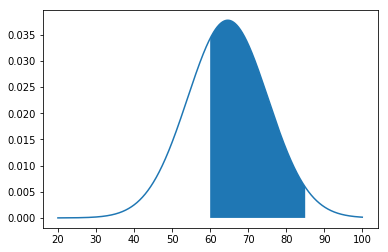

In [669]:
x = np.linspace(20,100,2000)
y = normal_cijfers.pdf(x)

plt.plot(x,y)
plt.fill_between(x,y, where=sp.logical_and(x>60, x<85))
plt.show()

## Gemiddeldes

In [621]:
averageLikes = movieData["movie_facebook_likes"].mean()
print("Gemidelde aantal likes per film is " + str(averageLikes))

Gemidelde aantal likes per film is 7525.9645052548085


In [622]:
movieData["movie_facebook_likes"].std()

19320.445109946737

## Meeste likes 

In [623]:
def getTotalLikesByColumn(column):
    groupedFacebookLikes = movieData.groupby(column)["movie_facebook_likes"].sum()
    key = groupedFacebookLikes.argmax()
    maxSum = groupedFacebookLikes.max()
    return str(key) + " heeft totaal "+ str(maxSum) + " likes";

In [624]:
print("De director met de meeste likes:")
print(getTotalLikesByColumn("director_name"))

De director met de meeste likes:
Christopher Nolan heeft totaal 829000 likes


C:\Users\atill\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


In [625]:
print("De hoofd acteur met de meeste likes:")
print(getTotalLikesByColumn("actor_1_name"))

De hoofd acteur met de meeste likes:
Leonardo DiCaprio heeft totaal 1096000 likes


C:\Users\atill\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


In [626]:
print("De film met de meeste likes:")
print(getTotalLikesByColumn("movie_title"))

De film met de meeste likes:
Interstellar  heeft totaal 349000 likes


C:\Users\atill\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


## Minste likes

In [627]:
def getMinLikesByColumn(column):
    groupedFacebookLikes = movieData.groupby(column)["movie_facebook_likes"].sum()
    key = groupedFacebookLikes.argmin()
    maxSum = groupedFacebookLikes.min()
    return str(key) + " heeft totaal "+ str(maxSum) + " likes";

In [628]:
print("De director met de minste likes:")
print(getMinLikesByColumn("director_name"))

De director met de minste likes:
Aaron Hann heeft totaal 0 likes


C:\Users\atill\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  This is separate from the ipykernel package so we can avoid doing imports until


In [629]:
print("De hoofd acteur met de minste likes:")
print(getMinLikesByColumn("actor_1_name"))

De hoofd acteur met de minste likes:
50 Cent heeft totaal 0 likes


C:\Users\atill\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  This is separate from the ipykernel package so we can avoid doing imports until


In [630]:
print("De film met de minste likes:")
print(getMinLikesByColumn("movie_title"))

De film met de minste likes:
10,000 B.C.              heeft totaal 0 likes


C:\Users\atill\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  This is separate from the ipykernel package so we can avoid doing imports until


## Graphs

In [631]:
movieYears = movieData["title_year"]
movieYears = movieYears[movieYears.notnull()]

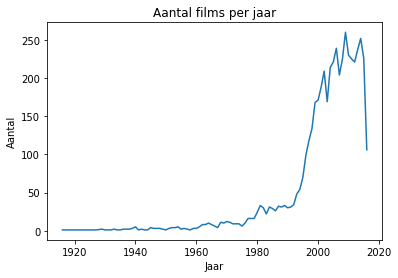

In [632]:
movieYearLabels,movieYearCounts = np.unique(movieYears,return_counts=True)
y_pos = np.arange(len(movieYearLabels))

plt.plot(movieYearLabels, movieYearCounts)
plt.ylabel("Aantal")
plt.xlabel("Jaar")
plt.title("Aantal films per jaar")
plt.show()

In [633]:
movieDurations = movieData.groupby("title_year")["duration"]
averageMovieTime = movieDurations.mean()

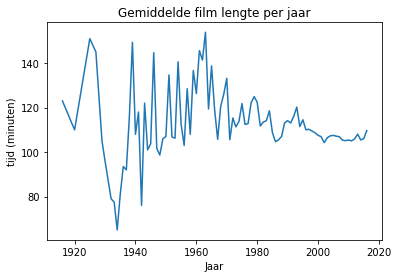

In [634]:
averageMovieTime.plot()
plt.ylabel("tijd (minuten)")
plt.xlabel("Jaar")
plt.title("Gemiddelde film lengte per jaar")
plt.show()

Facebook likes vs budget


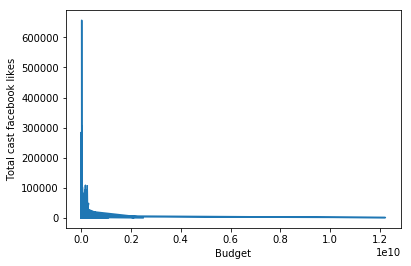

In [635]:
plt.plot(movieData["budget"], movieData["cast_total_facebook_likes"])
plt.ylabel("Total cast facebook likes")
plt.xlabel("Budget")
print("Facebook likes vs budget")
plt.show()